# Seamless Interaction Dataset Analysis
**Author:** bloggerwang1217  
**Date:** 2025-08-12  
**Goal:** Descriptive statistics for Sample Set + Session Groups


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
import cv2
import librosa
from seamless_interaction.fs import SeamlessInteractionFS, DatasetConfig
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [13]:
# Initialize Sample Set configuration
sample_config = DatasetConfig(
    label='improvised', 
    split='dev',
    preferred_vendors_only=True,
    local_dir=Path('../dataset/sample_set')
)
sample_fs = SeamlessInteractionFS(config=sample_config)
print(f'📁 Sample Set location: {sample_config.local_dir}')
print(f'🏷️  Sample Set label: {sample_config.label}')
print(f'📊 Sample Set split: {sample_config.split}')

# Initialize Session Groups configuration
session_config = DatasetConfig(
    label='improvised', 
    split='dev',
    preferred_vendors_only=True,
    local_dir=Path('../dataset/session_groups')
)
session_fs = SeamlessInteractionFS(config=session_config)
print(f'📁 Session Groups location: {session_config.local_dir}')
print(f'🏷️  Session Groups label: {session_config.label}')
print(f'📊 Session Groups split: {session_config.split}')

2025-08-12 21:37:04,503 - INFO - Loaded filelist with 129572 entries
2025-08-12 21:37:04,580 - INFO - Loaded filelist with 129572 entries
2025-08-12 21:37:04,580 - INFO - Loaded filelist with 129572 entries


📁 Sample Set location: ../dataset/sample_set
🏷️  Sample Set label: improvised
📊 Sample Set split: dev
📁 Session Groups location: ../dataset/session_groups
🏷️  Session Groups label: improvised
📊 Session Groups split: dev


## Step 1: Download Sample Set (~1GB)
Run this cell to download the first dataset

In [14]:
# Download Sample Set (you can run this when ready)
print('📂 Starting Sample Set download...')
try:
    sample_fs.download_batch_from_hf(batch_idx=0, archive_list=[0, 1, 2])
    print('✅ Sample Set download complete!')
except Exception as e:
    print(f'❌ Download failed: {e}')

2025-08-12 21:37:14,227 - INFO - Downloading 3 archives for batch 0


📂 Starting Sample Set download...


2025-08-12 21:37:15,395 - INFO - Downloading improvised/dev/0000/0002.tar to ../dataset/sample_set/improvised/dev/0000/0002.tar
2025-08-12 21:37:15,395 - INFO - Downloading improvised/dev/0000/0000.tar to ../dataset/sample_set/improvised/dev/0000/0000.tar
2025-08-12 21:37:15,395 - INFO - Downloading improvised/dev/0000/0001.tar to ../dataset/sample_set/improvised/dev/0000/0001.tar
2025-08-12 21:37:35,477 - INFO - Extracting ../dataset/sample_set/improvised/dev/0000/0000.tar to ../dataset/sample_set/improvised/dev/0000/0000
2025-08-12 21:37:35,477 - INFO - Extracting ../dataset/sample_set/improvised/dev/0000/0000.tar to ../dataset/sample_set/improvised/dev/0000/0000
2025-08-12 21:37:42,431 - INFO - Extracting ../dataset/sample_set/improvised/dev/0000/0001.tar to ../dataset/sample_set/improvised/dev/0000/0001
2025-08-12 21:37:42,431 - INFO - Extracting ../dataset/sample_set/improvised/dev/0000/0001.tar to ../dataset/sample_set/improvised/dev/0000/0001
2025-08-12 21:37:42,943 - INFO - Ext

✅ Sample Set download complete!


## Step 2: Download Session Groups (~400MB)
Run this after Step 1 completes

In [21]:
# Download Session Groups
print('🎯 Starting Session Groups download...')
try:
    file_ids = session_fs.sample_random_file_ids(num_samples=10)  # Start smaller
    for i, file_id in enumerate(file_ids):
        print(f'Downloading {i+1}/10: {file_id}')
        session_fs.gather_file_id_data_from_s3(file_id)
    print('✅ Session Groups download complete!')
except Exception as e:
    print(f'❌ Download failed: {e}')

2025-08-12 21:48:13,721 - INFO - Found 33 files for V00_S0700_I00000576_P0844A


🎯 Starting Session Groups download...


2025-08-12 21:48:19,533 - INFO - Skipping optional file annotations/1P-IS/V00_S0700_I00000576_P0844A.json
2025-08-12 21:48:19,558 - INFO - Skipping optional file annotations/3P-IS/V00_S0700_I00000576_P0844A.json
2025-08-12 21:48:19,645 - INFO - Skipping optional file annotations/3P-V/V00_S0700_I00000576_P0844A.json
2025-08-12 21:48:20,036 - INFO - Skipping optional file annotations/1P-R/V00_S0700_I00000576_P0844A.json
2025-08-12 21:48:20,085 - INFO - Skipping optional file annotations/3P-R/V00_S0700_I00000576_P0844A.json
2025-08-12 21:48:20,208 - INFO - Saved 24 numpy arrays to ../dataset/session_groups/improvised/dev/0000/0051/V00_S0700_I00000576_P0844A.npz
2025-08-12 21:48:20,208 - INFO - Successfully processed file V00_S0700_I00000576_P0844A to ../dataset/session_groups/improvised/dev/0000/0051
2025-08-12 21:48:20,036 - INFO - Skipping optional file annotations/1P-R/V00_S0700_I00000576_P0844A.json
2025-08-12 21:48:20,085 - INFO - Skipping optional file annotations/3P-R/V00_S0700_I00

2025-08-12 21:48:26,552 - INFO - Skipping optional file annotations/1P-IS/V00_S0809_I00000785_P0383.json
2025-08-12 21:48:26,983 - INFO - Skipping optional file annotations/3P-IS/V00_S0809_I00000785_P0383.json
2025-08-12 21:48:27,142 - INFO - Skipping optional file annotations/1P-R/V00_S0809_I00000785_P0383.json
2025-08-12 21:48:26,983 - INFO - Skipping optional file annotations/3P-IS/V00_S0809_I00000785_P0383.json
2025-08-12 21:48:27,142 - INFO - Skipping optional file annotations/1P-R/V00_S0809_I00000785_P0383.json
2025-08-12 21:48:27,245 - INFO - Skipping optional file annotations/3P-V/V00_S0809_I00000785_P0383.json
2025-08-12 21:48:27,245 - INFO - Skipping optional file annotations/3P-V/V00_S0809_I00000785_P0383.json
2025-08-12 21:48:27,580 - INFO - Skipping optional file annotations/3P-R/V00_S0809_I00000785_P0383.json
2025-08-12 21:48:27,580 - INFO - Skipping optional file annotations/3P-R/V00_S0809_I00000785_P0383.json
2025-08-12 21:48:27,856 - INFO - Saved 24 numpy arrays to ../

2025-08-12 21:48:30,807 - INFO - Skipping optional file movement/emotion_valence/V01_S0935_I00001226_P2040.npy
2025-08-12 21:48:30,983 - INFO - Skipping optional file movement/EmotionArousalToken/V01_S0935_I00001226_P2040.npy
2025-08-12 21:48:31,139 - INFO - Skipping optional file movement/expression/V01_S0935_I00001226_P2040.npy
2025-08-12 21:48:31,142 - INFO - Skipping optional file movement/frame_latent/V01_S0935_I00001226_P2040.npy
2025-08-12 21:48:31,233 - INFO - Skipping optional file movement/gaze_encodings/V01_S0935_I00001226_P2040.npy
2025-08-12 21:48:31,139 - INFO - Skipping optional file movement/expression/V01_S0935_I00001226_P2040.npy
2025-08-12 21:48:31,142 - INFO - Skipping optional file movement/frame_latent/V01_S0935_I00001226_P2040.npy
2025-08-12 21:48:31,233 - INFO - Skipping optional file movement/gaze_encodings/V01_S0935_I00001226_P2040.npy
2025-08-12 21:48:31,401 - INFO - Skipping optional file movement/EmotionValenceToken/V01_S0935_I00001226_P2040.npy
2025-08-12 

2025-08-12 21:48:40,073 - INFO - Skipping optional file annotations/1P-IS/V00_S0696_I00000543_P0844A.json
2025-08-12 21:48:40,550 - INFO - Skipping optional file annotations/3P-IS/V00_S0696_I00000543_P0844A.json
2025-08-12 21:48:40,723 - INFO - Skipping optional file annotations/1P-R/V00_S0696_I00000543_P0844A.json
2025-08-12 21:48:40,550 - INFO - Skipping optional file annotations/3P-IS/V00_S0696_I00000543_P0844A.json
2025-08-12 21:48:40,723 - INFO - Skipping optional file annotations/1P-R/V00_S0696_I00000543_P0844A.json
2025-08-12 21:48:41,043 - INFO - Skipping optional file annotations/3P-V/V00_S0696_I00000543_P0844A.json
2025-08-12 21:48:41,151 - INFO - Skipping optional file annotations/3P-R/V00_S0696_I00000543_P0844A.json
2025-08-12 21:48:41,043 - INFO - Skipping optional file annotations/3P-V/V00_S0696_I00000543_P0844A.json
2025-08-12 21:48:41,151 - INFO - Skipping optional file annotations/3P-R/V00_S0696_I00000543_P0844A.json
2025-08-12 21:48:41,353 - INFO - Saved 24 numpy arra

2025-08-12 21:48:46,663 - INFO - Skipping optional file annotations/1P-IS/V00_S0925_I00000488_P0816.json
2025-08-12 21:48:46,847 - INFO - Skipping optional file annotations/3P-V/V00_S0925_I00000488_P0816.json
2025-08-12 21:48:46,868 - INFO - Skipping optional file annotations/3P-IS/V00_S0925_I00000488_P0816.json
2025-08-12 21:48:46,868 - INFO - Skipping optional file annotations/3P-IS/V00_S0925_I00000488_P0816.json
2025-08-12 21:48:47,172 - INFO - Skipping optional file annotations/1P-R/V00_S0925_I00000488_P0816.json
2025-08-12 21:48:47,350 - INFO - Skipping optional file annotations/3P-R/V00_S0925_I00000488_P0816.json
2025-08-12 21:48:47,172 - INFO - Skipping optional file annotations/1P-R/V00_S0925_I00000488_P0816.json
2025-08-12 21:48:47,350 - INFO - Skipping optional file annotations/3P-R/V00_S0925_I00000488_P0816.json
2025-08-12 21:48:49,538 - INFO - Saved 24 numpy arrays to ../dataset/session_groups/improvised/dev/0000/0042/V00_S0925_I00000488_P0816.npz
2025-08-12 21:48:49,539 - 

2025-08-12 21:48:52,582 - INFO - Skipping optional file movement/emotion_valence/V01_S1881_I00000186_P2767.npy
2025-08-12 21:48:53,334 - INFO - Skipping optional file movement/expression/V01_S1881_I00000186_P2767.npy
2025-08-12 21:48:53,340 - INFO - Skipping optional file movement/EmotionValenceToken/V01_S1881_I00000186_P2767.npy
2025-08-12 21:48:53,374 - INFO - Skipping optional file movement/frame_latent/V01_S1881_I00000186_P2767.npy
2025-08-12 21:48:53,334 - INFO - Skipping optional file movement/expression/V01_S1881_I00000186_P2767.npy
2025-08-12 21:48:53,340 - INFO - Skipping optional file movement/EmotionValenceToken/V01_S1881_I00000186_P2767.npy
2025-08-12 21:48:53,374 - INFO - Skipping optional file movement/frame_latent/V01_S1881_I00000186_P2767.npy
2025-08-12 21:48:53,870 - INFO - Skipping optional file movement/FAUToken/V01_S1881_I00000186_P2767.npy
2025-08-12 21:48:53,876 - INFO - Skipping optional file movement/gaze_encodings/V01_S1881_I00000186_P2767.npy
2025-08-12 21:48:

2025-08-12 21:49:01,955 - INFO - Skipping optional file annotations/1P-IS/V00_S0648_I00000382_P0801.json
2025-08-12 21:49:02,130 - INFO - Skipping optional file annotations/3P-IS/V00_S0648_I00000382_P0801.json
2025-08-12 21:49:02,340 - INFO - Skipping optional file annotations/3P-V/V00_S0648_I00000382_P0801.json
2025-08-12 21:49:02,517 - INFO - Skipping optional file annotations/1P-R/V00_S0648_I00000382_P0801.json
2025-08-12 21:49:02,340 - INFO - Skipping optional file annotations/3P-V/V00_S0648_I00000382_P0801.json
2025-08-12 21:49:02,517 - INFO - Skipping optional file annotations/1P-R/V00_S0648_I00000382_P0801.json
2025-08-12 21:49:02,613 - INFO - Skipping optional file annotations/3P-R/V00_S0648_I00000382_P0801.json
2025-08-12 21:49:02,613 - INFO - Skipping optional file annotations/3P-R/V00_S0648_I00000382_P0801.json
2025-08-12 21:49:03,050 - INFO - Saved 24 numpy arrays to ../dataset/session_groups/improvised/dev/0000/0052/V00_S0648_I00000382_P0801.npz
2025-08-12 21:49:03,051 - I

2025-08-12 21:49:08,825 - INFO - Skipping optional file annotations/1P-IS/V00_S0809_I00000126_P0947.json
2025-08-12 21:49:09,388 - INFO - Skipping optional file annotations/3P-IS/V00_S0809_I00000126_P0947.json
2025-08-12 21:49:09,465 - INFO - Skipping optional file annotations/1P-R/V00_S0809_I00000126_P0947.json
2025-08-12 21:49:09,388 - INFO - Skipping optional file annotations/3P-IS/V00_S0809_I00000126_P0947.json
2025-08-12 21:49:09,465 - INFO - Skipping optional file annotations/1P-R/V00_S0809_I00000126_P0947.json
2025-08-12 21:49:09,943 - INFO - Skipping optional file annotations/3P-R/V00_S0809_I00000126_P0947.json
2025-08-12 21:49:10,065 - INFO - Skipping optional file annotations/3P-V/V00_S0809_I00000126_P0947.json
2025-08-12 21:49:09,943 - INFO - Skipping optional file annotations/3P-R/V00_S0809_I00000126_P0947.json
2025-08-12 21:49:10,065 - INFO - Skipping optional file annotations/3P-V/V00_S0809_I00000126_P0947.json
2025-08-12 21:49:11,404 - INFO - Saved 24 numpy arrays to ../

2025-08-12 21:49:18,143 - INFO - Skipping optional file annotations/1P-IS/V00_S2020_I00000679_P1276A.json
2025-08-12 21:49:18,407 - INFO - Skipping optional file annotations/3P-IS/V00_S2020_I00000679_P1276A.json
2025-08-12 21:49:18,493 - INFO - Skipping optional file annotations/3P-V/V00_S2020_I00000679_P1276A.json
2025-08-12 21:49:18,407 - INFO - Skipping optional file annotations/3P-IS/V00_S2020_I00000679_P1276A.json
2025-08-12 21:49:18,493 - INFO - Skipping optional file annotations/3P-V/V00_S2020_I00000679_P1276A.json
2025-08-12 21:49:18,719 - INFO - Skipping optional file annotations/1P-R/V00_S2020_I00000679_P1276A.json
2025-08-12 21:49:18,719 - INFO - Skipping optional file annotations/1P-R/V00_S2020_I00000679_P1276A.json
2025-08-12 21:49:18,966 - INFO - Skipping optional file annotations/3P-R/V00_S2020_I00000679_P1276A.json
2025-08-12 21:49:18,966 - INFO - Skipping optional file annotations/3P-R/V00_S2020_I00000679_P1276A.json
2025-08-12 21:49:19,261 - INFO - Saved 24 numpy arra

2025-08-12 21:49:26,157 - INFO - Skipping optional file annotations/1P-IS/V00_S1061_I00000160_P0383.json
2025-08-12 21:49:26,192 - INFO - Skipping optional file annotations/3P-IS/V00_S1061_I00000160_P0383.json
2025-08-12 21:49:26,738 - INFO - Skipping optional file annotations/1P-R/V00_S1061_I00000160_P0383.json
2025-08-12 21:49:26,748 - INFO - Skipping optional file annotations/3P-R/V00_S1061_I00000160_P0383.json
2025-08-12 21:49:26,738 - INFO - Skipping optional file annotations/1P-R/V00_S1061_I00000160_P0383.json
2025-08-12 21:49:26,748 - INFO - Skipping optional file annotations/3P-R/V00_S1061_I00000160_P0383.json
2025-08-12 21:49:27,372 - INFO - Skipping optional file annotations/3P-V/V00_S1061_I00000160_P0383.json
2025-08-12 21:49:27,372 - INFO - Skipping optional file annotations/3P-V/V00_S1061_I00000160_P0383.json
2025-08-12 21:49:30,063 - INFO - Saved 24 numpy arrays to ../dataset/session_groups/improvised/dev/0000/0043/V00_S1061_I00000160_P0383.npz
2025-08-12 21:49:30,064 - I

✅ Session Groups download complete!


## Step 3: Basic File Structure Analysis
Let's see what we downloaded

In [22]:
# Analyze Sample Set file structure
sample_files = list(sample_config.local_dir.rglob('*'))
print(f'Total Sample Set files found: {len([f for f in sample_files if f.is_file()])}')
sample_file_types = {}
for file_path in sample_files:
    if file_path.is_file():
        ext = file_path.suffix.lower()
        sample_file_types[ext] = sample_file_types.get(ext, 0) + 1
df_sample_files = pd.DataFrame([
    {'File_Type': ext, 'Count': count}
    for ext, count in sample_file_types.items()
])
print('\n📁 Sample Set File Type Distribution:')
display(df_sample_files)

# Analyze Session Groups file structure
session_files = list(session_config.local_dir.rglob('*'))
print(f'Total Session Groups files found: {len([f for f in session_files if f.is_file()])}')
session_file_types = {}
for file_path in session_files:
    if file_path.is_file():
        ext = file_path.suffix.lower()
        session_file_types[ext] = session_file_types.get(ext, 0) + 1
df_session_files = pd.DataFrame([
    {'File_Type': ext, 'Count': count}
    for ext, count in session_file_types.items()
])
print('\n📁 Session Groups File Type Distribution:')
display(df_session_files)

Total Sample Set files found: 139

📁 Sample Set File Type Distribution:


,File_Type,Count
0,.wav,33
1,.mp4,33
2,.json,33
3,.npz,33
4,,1
5,.metadata,3
6,.lock,3


Total Session Groups files found: 40

📁 Session Groups File Type Distribution:


,File_Type,Count
0,.mp4,10
1,.json,10
2,.wav,10
3,.npz,10


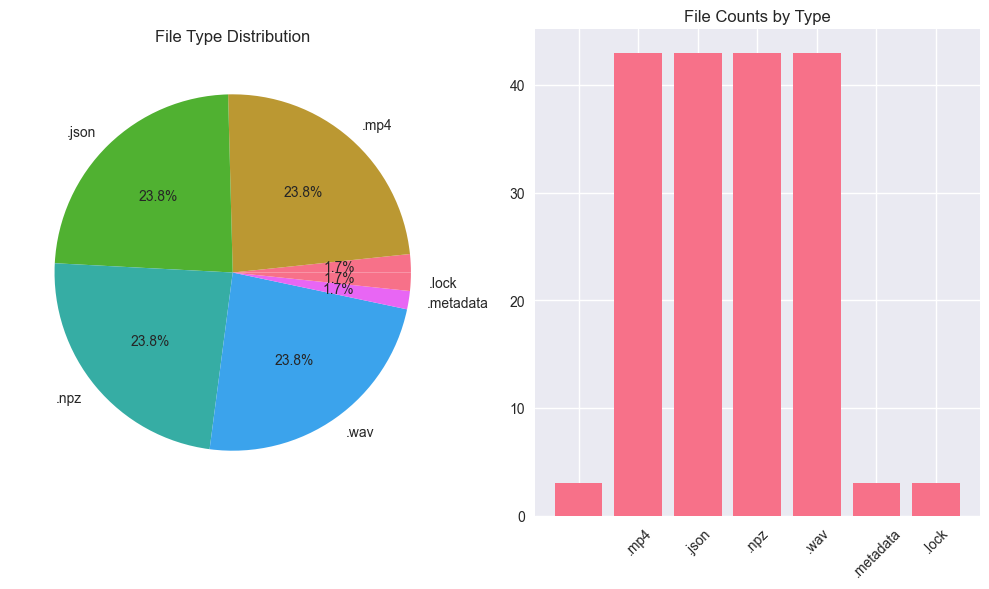

In [12]:
# Visualize file distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.pie(df_files['Count'], labels=df_files['File_Type'], autopct='%1.1f%%')
plt.title('File Type Distribution')

plt.subplot(1, 2, 2)
plt.bar(df_files['File_Type'], df_files['Count'])
plt.title('File Counts by Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Note: Session Groups Download Completeness

Some session groups may be missing one or more modalities (e.g., .mp4, .wav, .npz, .json) after download. This can happen due to incomplete downloads or missing files on the server.

To ensure completeness, use the provided code block to check for missing files and automatically attempt to download any that are missing for a given file ID.

If you encounter missing files, rerun the check or adjust the code to verify other file IDs as needed.